In [1]:
import sqlite3
import pandas as pd

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('trending_repos.db')

In [3]:
# Fetch data from the database
query = 'SELECT * FROM trending_repos'
df = pd.read_sql_query(query, conn)

In [4]:
# Display the data
df

,id,name,url,description,language,stars,forks,date
0,1,immich,https://github.com/immich-app/immich,\n High performance self-hosted photo and...,TypeScript,46757,2316,2024-09-30
1,2,spotube,https://github.com/KRTirtho/spotube,\n 🎧 Open source Spotify client that does...,Dart,29493,1214,2024-09-30
2,3,TTS,https://github.com/coqui-ai/TTS,\n 🐸💬 - a deep learning toolkit for Text-...,Python,34035,4131,2024-09-30
3,4,nextra,https://github.com/shuding/nextra,"\n Simple, powerful and flexible site gen...",TypeScript,11555,1253,2024-09-30
4,5,dice,https://github.com/DiceDB/dice,"\n DiceDB is an in-memory, real-time, and...",Go,5318,677,2024-09-30
...,...,...,...,...,...,...,...,...
74,110,signoz,https://github.com/SigNoz/signoz,\n SigNoz is an open-source observability...,TypeScript,18707,1213,2024-10-05
75,111,grype,https://github.com/anchore/grype,\n A vulnerability scanner for container ...,Go,8581,560,2024-10-05
76,112,supabase,https://github.com/supabase/supabase,\n The open source Firebase alternative. ...,TypeScript,72299,6945,2024-10-05
77,113,trpc,https://github.com/trpc/trpc,\n 🧙‍♀️ Move Fast and Break Nothing. End-...,TypeScript,34590,1227,2024-10-05


In [5]:
# Close the database connection
conn.close()

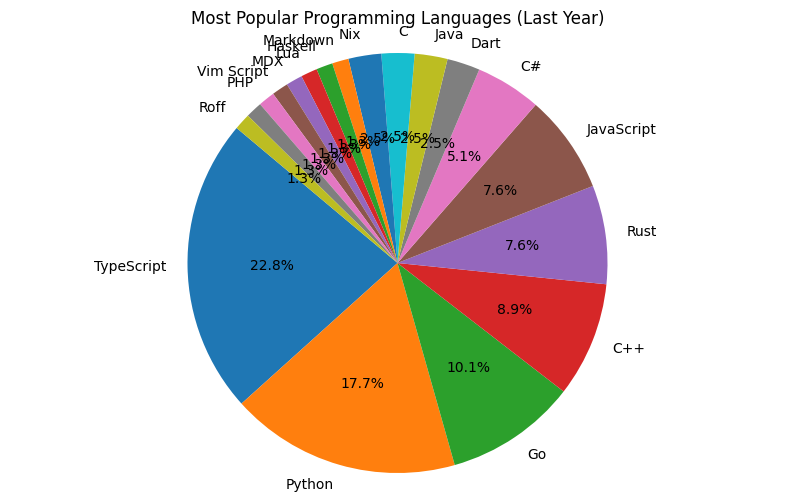

In [6]:
import pandas as pd

import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Function to filter data based on time interval
def filter_data(interval):
    if interval == 'today':
        filtered_df = df[df['date'] == pd.Timestamp('today').normalize()]
    elif interval == 'last_week':
        filtered_df = df[df['date'] >= pd.Timestamp('today') - pd.Timedelta(days=7)]
    elif interval == 'last_year':
        filtered_df = df[df['date'] >= pd.Timestamp('today') - pd.DateOffset(years=1)]
    else:
        filtered_df = df
    return filtered_df

# Function to plot pie chart
def plot_pie_chart(interval):
    filtered_df = filter_data(interval)
    language_counts = filtered_df['language'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Most Popular Programming Languages ({interval.replace("_", " ").title()})')
    plt.axis('equal')
    plt.show()

interval = 'last_year'  # Change to 'last_week' or 'last_year' as needed
plot_pie_chart(interval)